# Descubrimientos de patrones de accidentes de tránsito en la CDMX

## Análisis exploratorio de los reportes C5 de la CDMX

In [1]:
from math import radians, cos, sin, asin, sqrt, atan2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from pylab import rcParams
import seaborn as sns
import folium
import networkx as nx
import osmnx as ox
import geopandas as gpd
from shapely.geometry import Point, Polygon, LineString, MultiLineString
import shapefile as shp
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', None)

Cargamos la base de accidentes de C5

In [2]:
url = '/Users/daniel.rodriguez/Documents/ACC/ACC_PROOF/ACC1/shp_b/original_data/ptos_C5_n/incidentes-viales-c5.geojson'
pts = gpd.read_file(url)
real_pts = pts[(pts['codigo_cierre']=='(A) La unidad de atención a emergencias fue despachada, llegó al lugar de los hechos y confirmó la emergencia reportada')|(pts['codigo_cierre']=='(I) El incidente reportado es afirmativo y se añade información adicional al evento')]

In [3]:
fechas2 = real_pts['hora_creacion'].str.split(":", expand = True)
real_pts['hora'] = fechas2[0]

In [4]:
pts14 = real_pts[real_pts['ano']=='2014']
pts15 = real_pts[real_pts['ano']=='2015']
pts16 = real_pts[real_pts['ano']=='2016']
pts17 = real_pts[real_pts['ano']=='2017']
pts18 = real_pts[real_pts['ano']=='2018']
pts19 = real_pts[real_pts['ano']=='2019']

### ¿Cómo se distribuyen los accidentes por año?

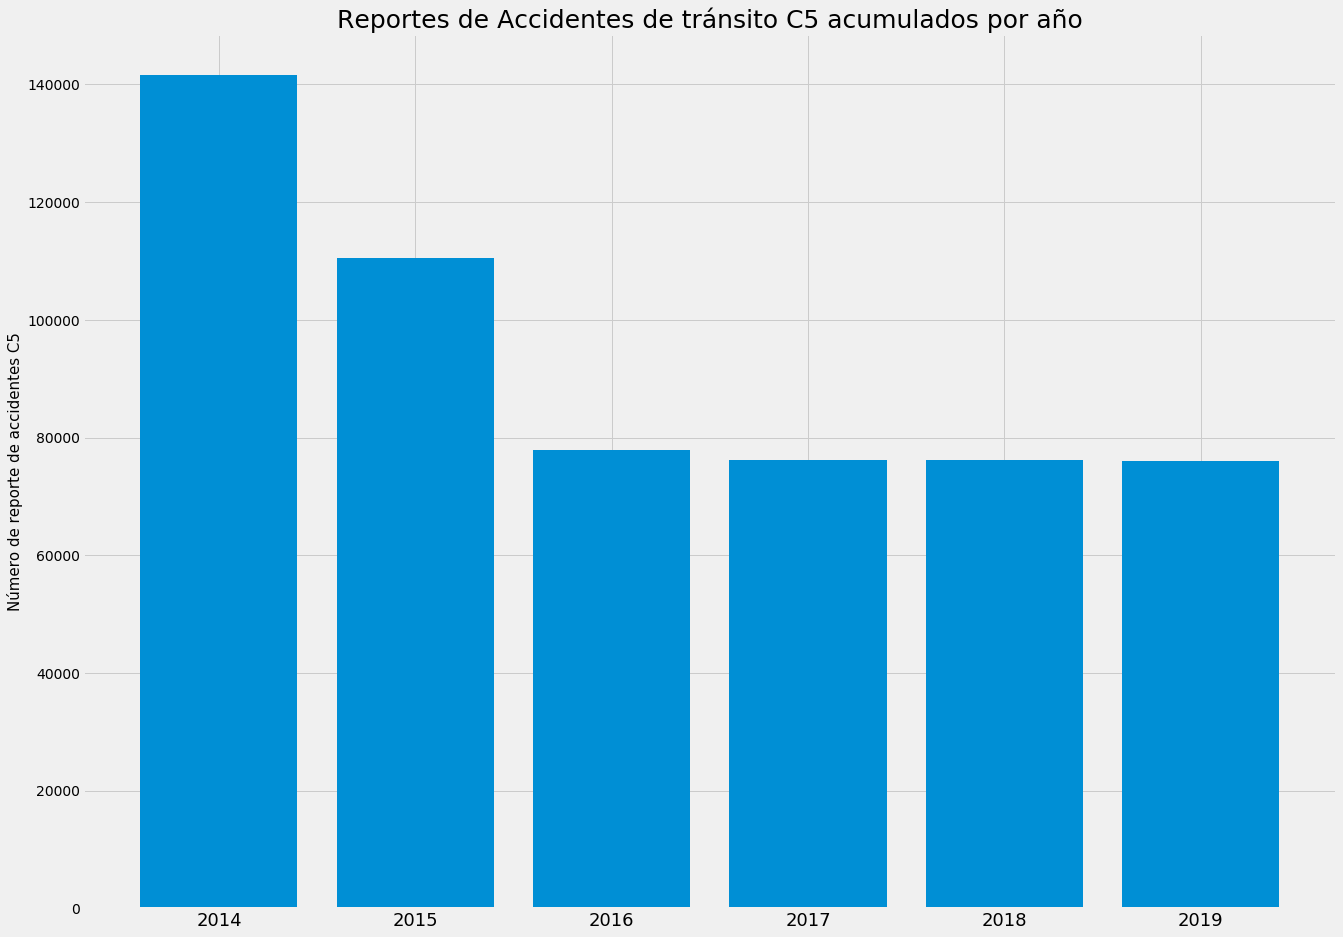

In [6]:
años = real_pts.groupby('ano').count()[['folio']].reset_index()

fig, ax = plt.subplots(1,1,figsize=(20, 15))
ax.bar(años.ano, años.folio)
plt.xticks(fontsize = 18)
plt.ylabel("Número de reporte de accidentes C5",fontsize =15)
plt.title("Reportes de Accidentes de tránsito C5 acumulados por año", loc='center', fontsize=25, fontweight=0)
   
#fig.savefig('/Users/daniel.rodriguez/Documents/ACC/ACC_PROOF/ACC1/EDA_acc/por_año.png', format = 'png', dpi = 200, bbox_inches = 'tight')
plt.show()


### ¿Cómo se distribuyen los accidentes por mes?

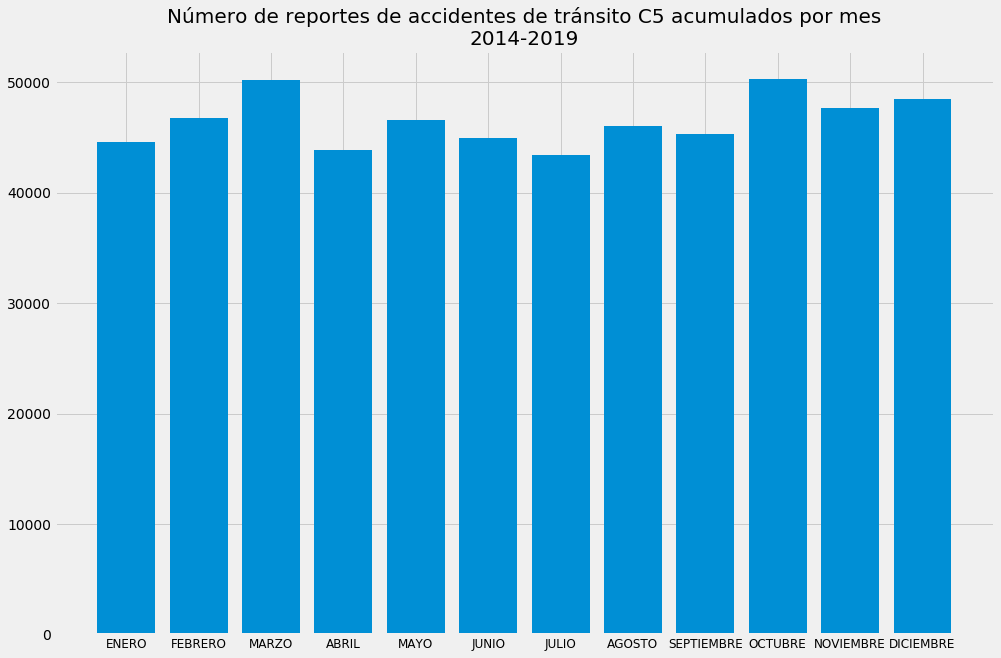

In [7]:
por_mes  = real_pts.groupby(['mes']).count()[['folio']].reset_index().reset_index()
por_mes.mes.replace(['1','2','3','4','5','6','7','8','9','10','11','12'],
                    ['ENERO','FEBRERO','MARZO','ABRIL','MAYO','JUNIO','JULIO','AGOSTO','SEPTIEMBRE','OCTUBRE','NOVIEMBRE','DICIEMBRE'], inplace = True)
por_mes.columns = ['id','mes','conteo']
por_mes.id.replace([0,1,2,3,4,5,6,7,8,9,10,11], [0,9,10,11,1,2,3,4,5,6,7,8], inplace = True)
por_mes = por_mes.sort_values('id')


fig, ax = plt.subplots(figsize = (15, 10))
ax.bar(por_mes.mes, por_mes.conteo)
plt.title("Número de reportes de accidentes de tránsito C5 acumulados por mes\n2014-2019", loc='center', fontsize=20, fontweight=0)
plt.xticks(fontsize = 12)
#fig.savefig('/Users/daniel.rodriguez/Documents/ACC/ACC_PROOF/ACC1/EDA_acc/por_mes.png', format = 'png', dpi = 200, bbox_inches = 'tight')
plt.show()

### ¿Cómo se distribuyen los accidentes por mes y año?

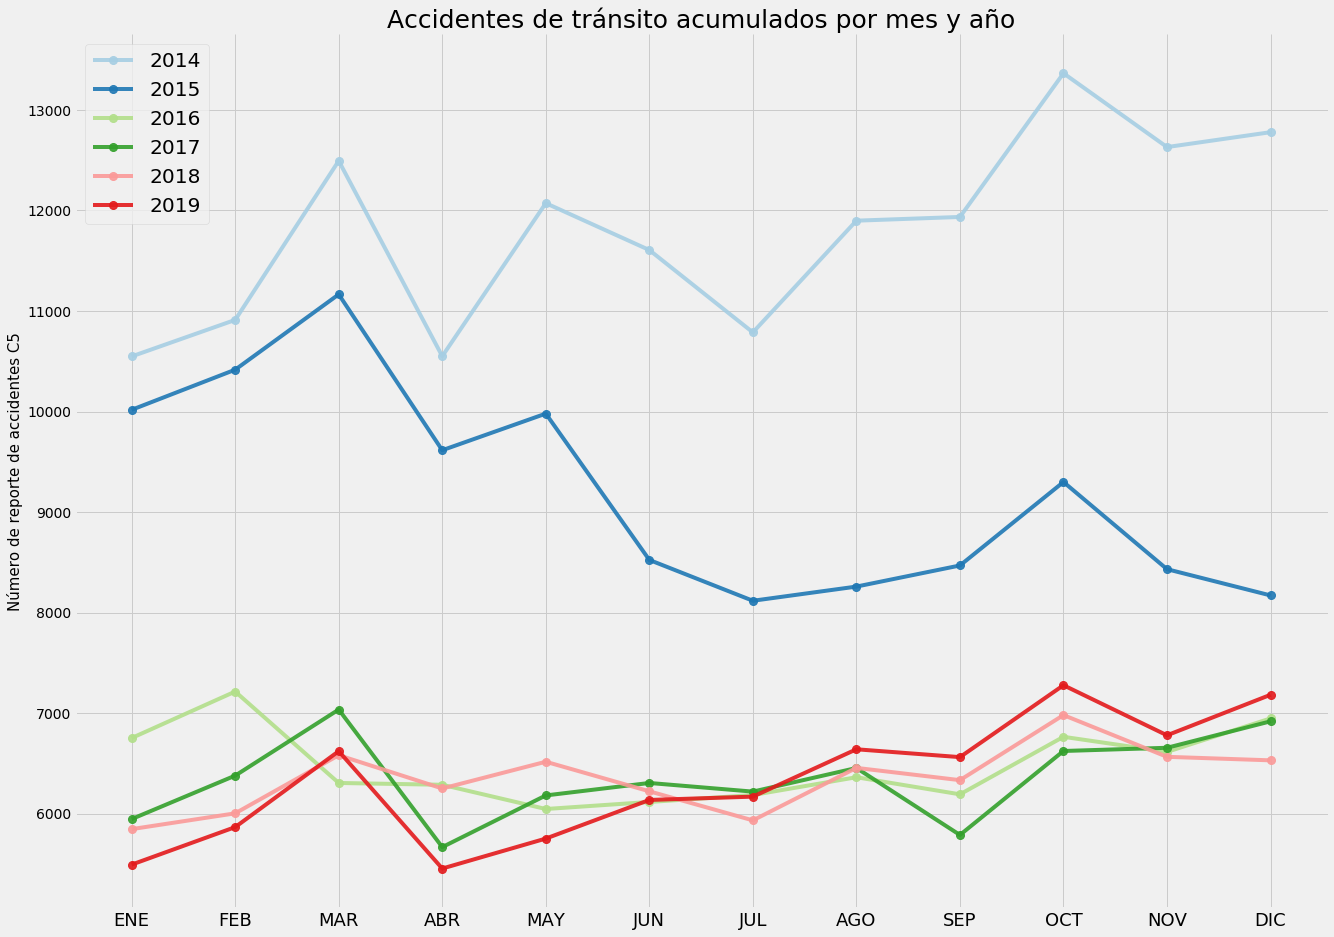

In [8]:
mes14 = pts14.groupby('mes').count()[['folio']].reset_index().reset_index()
mes14.columns = ['id','mes','conteo']
mes14.id.replace([0,1,2,3,4,5,6,7,8,9,10,11], [0,9,10,11,1,2,3,4,5,6,7,8], inplace = True)
mes14 = mes14.sort_values('id')

mes15 = pts15.groupby('mes').count()[['folio']].reset_index().reset_index()
mes15.columns = ['id','mes','conteo']
mes15.id.replace([0,1,2,3,4,5,6,7,8,9,10,11], [0,9,10,11,1,2,3,4,5,6,7,8], inplace = True)
mes15 = mes15.sort_values('id')

mes16 = pts16.groupby('mes').count()[['folio']].reset_index().reset_index()
mes16.columns = ['id','mes','conteo']
mes16.id.replace([0,1,2,3,4,5,6,7,8,9,10,11], [0,9,10,11,1,2,3,4,5,6,7,8], inplace = True)
mes16 = mes16.sort_values('id')

mes17 = pts17.groupby('mes').count()[['folio']].reset_index().reset_index()
mes17.columns = ['id','mes','conteo']
mes17.id.replace([0,1,2,3,4,5,6,7,8,9,10,11], [0,9,10,11,1,2,3,4,5,6,7,8], inplace = True)
mes17 = mes17.sort_values('id')

mes18 = pts18.groupby('mes').count()[['folio']].reset_index().reset_index()
mes18.columns = ['id','mes','conteo']
mes18.id.replace([0,1,2,3,4,5,6,7,8,9,10,11], [0,9,10,11,1,2,3,4,5,6,7,8], inplace = True)
mes18 = mes18.sort_values('id')

mes19 = pts19.groupby('mes').count()[['folio']].reset_index().reset_index()
mes19.columns = ['id','mes','conteo']
mes19.id.replace([0,1,2,3,4,5,6,7,8,9,10,11], [0,9,10,11,1,2,3,4,5,6,7,8], inplace = True)
mes19 = mes19.sort_values('id')
   

fig, ax = plt.subplots(1,1,figsize=(20, 15))

x = ['ENE','FEB','MAR','ABR','MAY','JUN','JUL','AGO','SEP','OCT','NOV','DIC']
 
ax.plot(x, mes14.conteo, marker='o', color='#a6cee3', markersize=8, linewidth=4, alpha=0.9, label = '2014')
ax.plot(x, mes15.conteo, marker='o', color='#1f78b4', markersize=8, linewidth=4, alpha=0.9, label = '2015')
ax.plot(x, mes16.conteo, marker='o', color='#b2df8a', markersize=8, linewidth=4, alpha=0.9, label = '2016')
ax.plot(x, mes17.conteo, marker='o', color='#33a02c', markersize=8, linewidth=4, alpha=0.9, label = '2017')
ax.plot(x, mes18.conteo, marker='o', color='#fb9a99', markersize=8, linewidth=4, alpha=0.9, label = '2018')
ax.plot(x, mes19.conteo, marker='o', color='#e31a1c', markersize=8, linewidth=4, alpha=0.9, label = '2019')
plt.xticks(fontsize = 18)
plt.ylabel("Número de reporte de accidentes C5",fontsize =15)
ax.legend(fontsize = 'x-large')
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)
plt.title("Accidentes de tránsito acumulados por mes y año", loc='center', fontsize=25, fontweight=0)  
#fig.savefig('/Users/daniel.rodriguez/Documents/ACC/ACC_PROOF/ACC1/EDA_acc/por_mes_año_l.png', format = 'png', dpi = 200, bbox_inches = 'tight')
plt.show()
plt.close()



### ¿Cómo se distribuyen los accidentes por día de la semana y año?

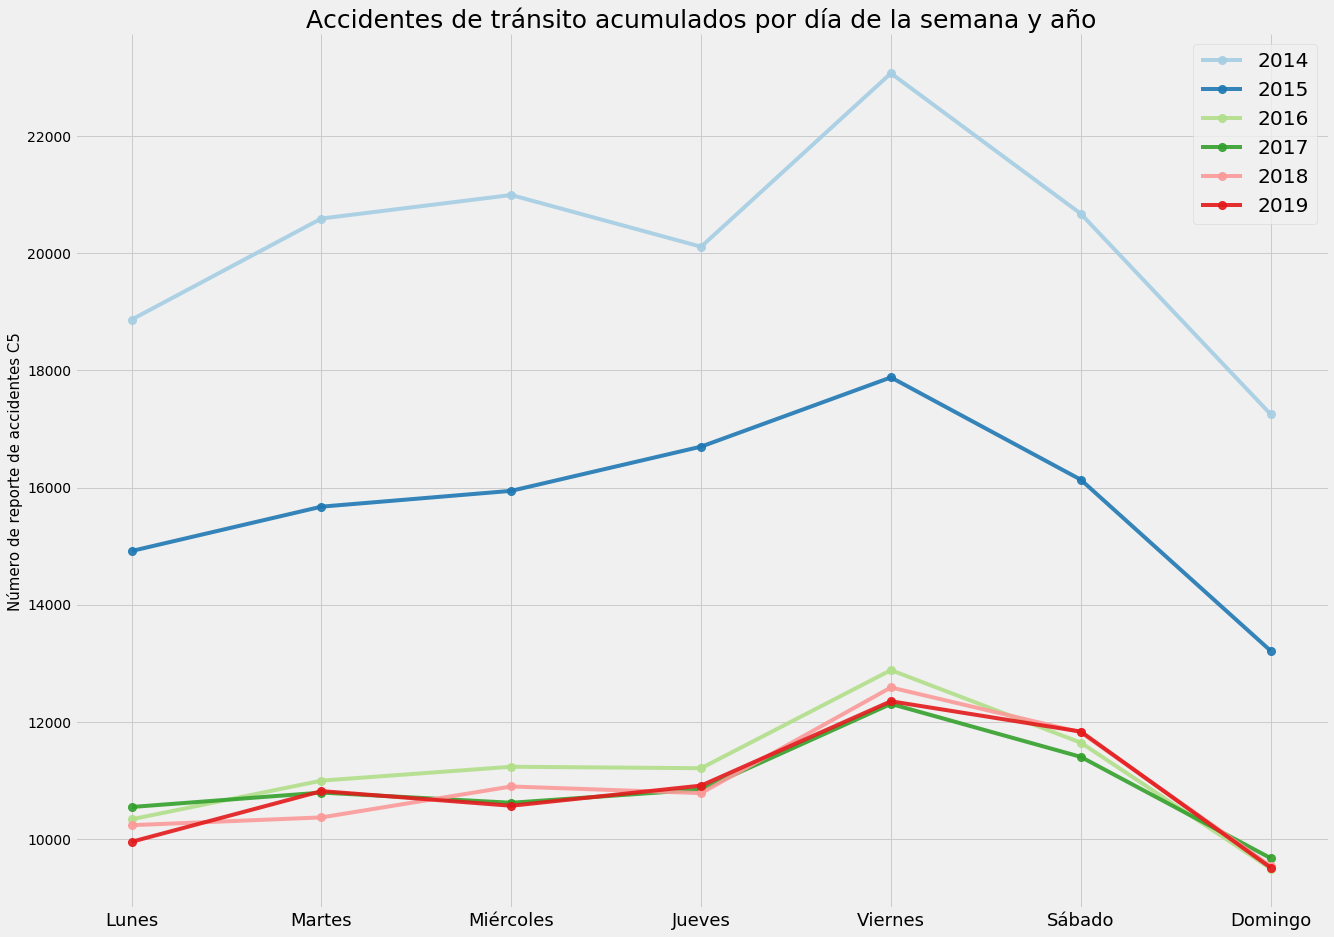

In [9]:
dia_sem14 = pts14.groupby('dia_semana').count()[['folio']].reset_index().reset_index()
dia_sem14.columns = ['id','dia','conteo']
dia_sem14.id.replace([0,1,2,3,4,5,6], [6,3,0,1,2,5,4], inplace = True)
dia_sem14 = dia_sem14.sort_values('id')

dia_sem15 = pts15.groupby('dia_semana').count()[['folio']].reset_index().reset_index()
dia_sem15.columns = ['id','dia','conteo']
dia_sem15.id.replace([0,1,2,3,4,5,6], [6,3,0,1,2,5,4], inplace = True)
dia_sem15 = dia_sem15.sort_values('id')

dia_sem16 = pts16.groupby('dia_semana').count()[['folio']].reset_index().reset_index()
dia_sem16.columns = ['id','dia','conteo']
dia_sem16.id.replace([0,1,2,3,4,5,6], [6,3,0,1,2,5,4], inplace = True)
dia_sem16 = dia_sem16.sort_values('id')

dia_sem17 = pts17.groupby('dia_semana').count()[['folio']].reset_index().reset_index()
dia_sem17.columns = ['id','dia','conteo']
dia_sem17.id.replace([0,1,2,3,4,5,6], [6,3,0,1,2,5,4], inplace = True)
dia_sem17 = dia_sem17.sort_values('id')

dia_sem18 = pts18.groupby('dia_semana').count()[['folio']].reset_index().reset_index()
dia_sem18.columns = ['id','dia','conteo']
dia_sem18.id.replace([0,1,2,3,4,5,6], [6,3,0,1,2,5,4], inplace = True)
dia_sem18 = dia_sem18.sort_values('id')

dia_sem19 = pts19.groupby('dia_semana').count()[['folio']].reset_index().reset_index()
dia_sem19.columns = ['id','dia','conteo']
dia_sem19.id.replace([0,1,2,3,4,5,6], [6,3,0,1,2,5,4], inplace = True)
dia_sem19 = dia_sem19.sort_values('id')
    

fig, ax = plt.subplots(1,1,figsize=(20, 15))
  
ax.plot(dia_sem14.dia, dia_sem14.conteo, marker='o', color='#a6cee3', markersize=8, linewidth=4, alpha=0.9, label = '2014')
ax.plot(dia_sem15.dia, dia_sem15.conteo, marker='o', color='#1f78b4', markersize=8, linewidth=4, alpha=0.9, label = '2015')
ax.plot(dia_sem16.dia, dia_sem16.conteo, marker='o', color='#b2df8a', markersize=8, linewidth=4, alpha=0.9, label = '2016')
ax.plot(dia_sem17.dia, dia_sem17.conteo, marker='o', color='#33a02c', markersize=8, linewidth=4, alpha=0.9, label = '2017')
ax.plot(dia_sem18.dia, dia_sem18.conteo, marker='o', color='#fb9a99', markersize=8, linewidth=4, alpha=0.9, label = '2018')
ax.plot(dia_sem19.dia, dia_sem19.conteo, marker='o', color='#e31a1c', markersize=8, linewidth=4, alpha=0.9, label = '2019')
plt.xticks(fontsize = 18)
plt.ylabel("Número de reporte de accidentes C5",fontsize =15)
ax.legend(fontsize = 'x-large')
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)
plt.title("Accidentes de tránsito acumulados por día de la semana y año", loc='center', fontsize=25, fontweight=0)
#fig.savefig('/Users/daniel.rodriguez/Documents/ACC/ACC_PROOF/ACC1/EDA_acc/por_dia_sem.png', format = 'png', dpi = 200, bbox_inches = 'tight')
plt.show()




### ¿Cómo es la tendencia de la ocurrencia por día?

In [7]:
por_fecha = pd.read_csv('/Users/daniel.rodriguez/Documents/ACC/ACC_PROOF/ACC1/EDA_acc/por_fecha.csv', sep = ',', encoding = 'utf-8')
por_fecha.fecha = pd.to_datetime(por_fecha.fecha, format = '%d/%m/%y')

In [8]:
from statsmodels.nonparametric.smoothers_lowess import lowess

x = por_fecha.fecha
y = por_fecha.conteo

filtered = lowess(y, x, is_sorted = True, frac = 0.09, it = 0)
por_fecha['LOESS'] = filtered[:,1]

In [9]:
atipico = por_fecha[por_fecha['conteo']==771]

Text(2015-04-25T00:00:00.000000000, 800, 'Valor atípico\n24/12/2014\n771')

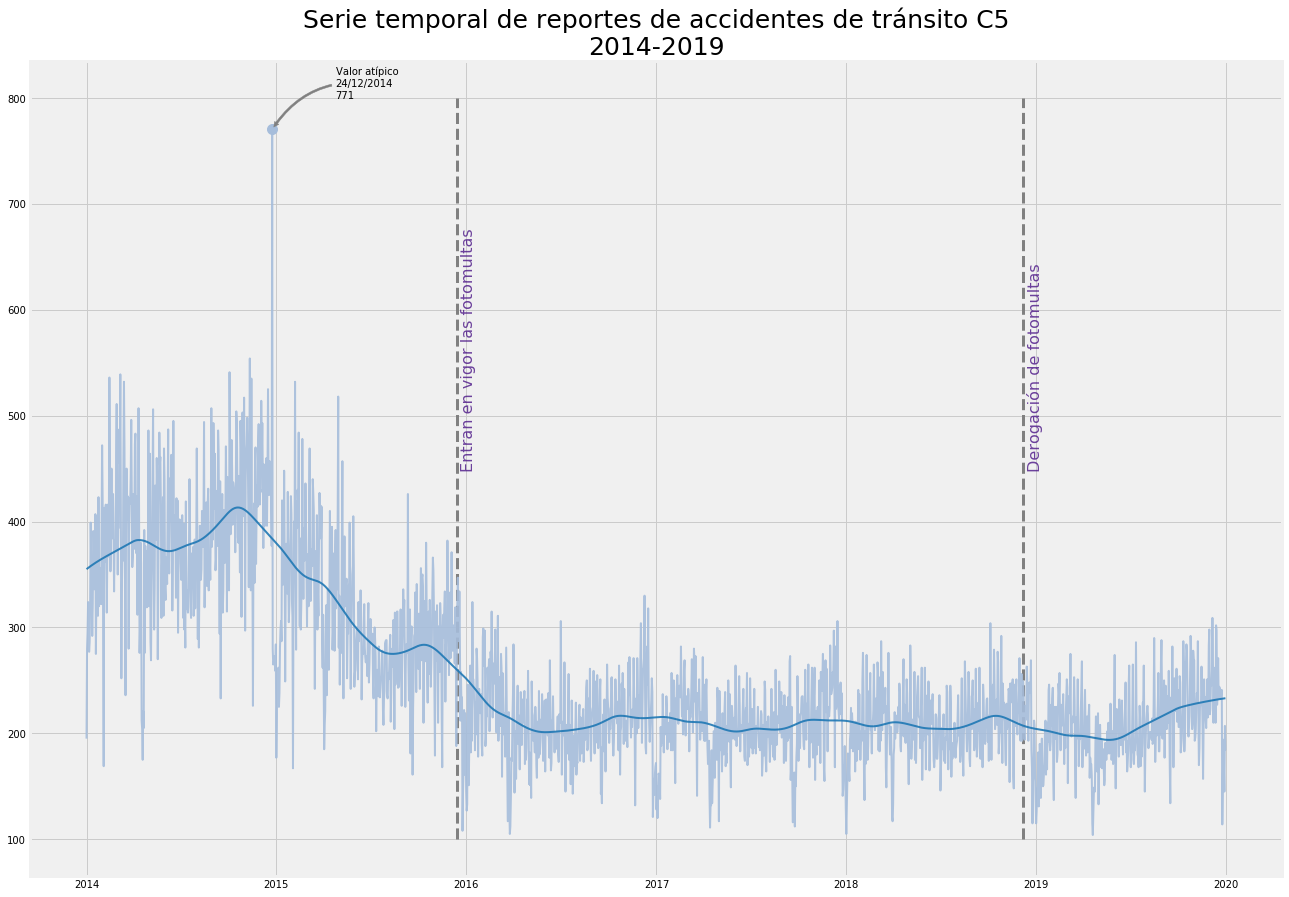

In [10]:
fig, ax = plt.subplots(1,1,figsize=(20, 15))
ax.plot(por_fecha.fecha,por_fecha.conteo, marker='', color='#a6bddb', linewidth=2, alpha=0.9)
ax.plot(por_fecha.fecha, por_fecha.LOESS, marker='', color='#1f78b4', linewidth=2, alpha=0.9)
ax.plot(atipico.fecha,atipico.conteo, marker = 'o', markersize = 10, color = '#a6bddb')
plt.title("Serie temporal de reportes de accidentes de tránsito C5\n2014-2019", loc='center', fontsize=25, fontweight=0)

ax.vlines(x='2015-12-15T00:00:00.000000000', ymin=100, ymax=800, color='gray', alpha=1, linewidth=3, linestyles='--')
plt.text('2015-12-22T00:00:00.000000000', 450, 'Entran en vigor las fotomultas', color = '#4a1486', alpha = 0.8, rotation = 90,fontsize=16)

ax.vlines(x='2018-12-06T00:00:00.000000000', ymin=100, ymax=800, color='gray', alpha=1, linewidth=3, linestyles='--')
plt.text('2018-12-15T00:00:00.000000000', 450, 'Derogación de fotomultas', color = '#4a1486', alpha = 0.8, rotation = 90,fontsize=16)

ax.annotate("Valor atípico\n24/12/2014\n771", xy = ('2014-12-25T00:00:00.000000000',771),xytext=('2015-04-25T00:00:00.000000000', 800),
            arrowprops = dict(arrowstyle ='simple', color = 'gray', connectionstyle="arc3, rad = 0.3"))

#fig.savefig('/Users/daniel.rodriguez/Documents/ACC/ACC_PROOF/ACC1/EDA_acc/ts_acc.png', format = 'png', dpi = 200, bbox_inches = 'tight')


### ¿Cómo se distribuyen los accidentes por hora y año?

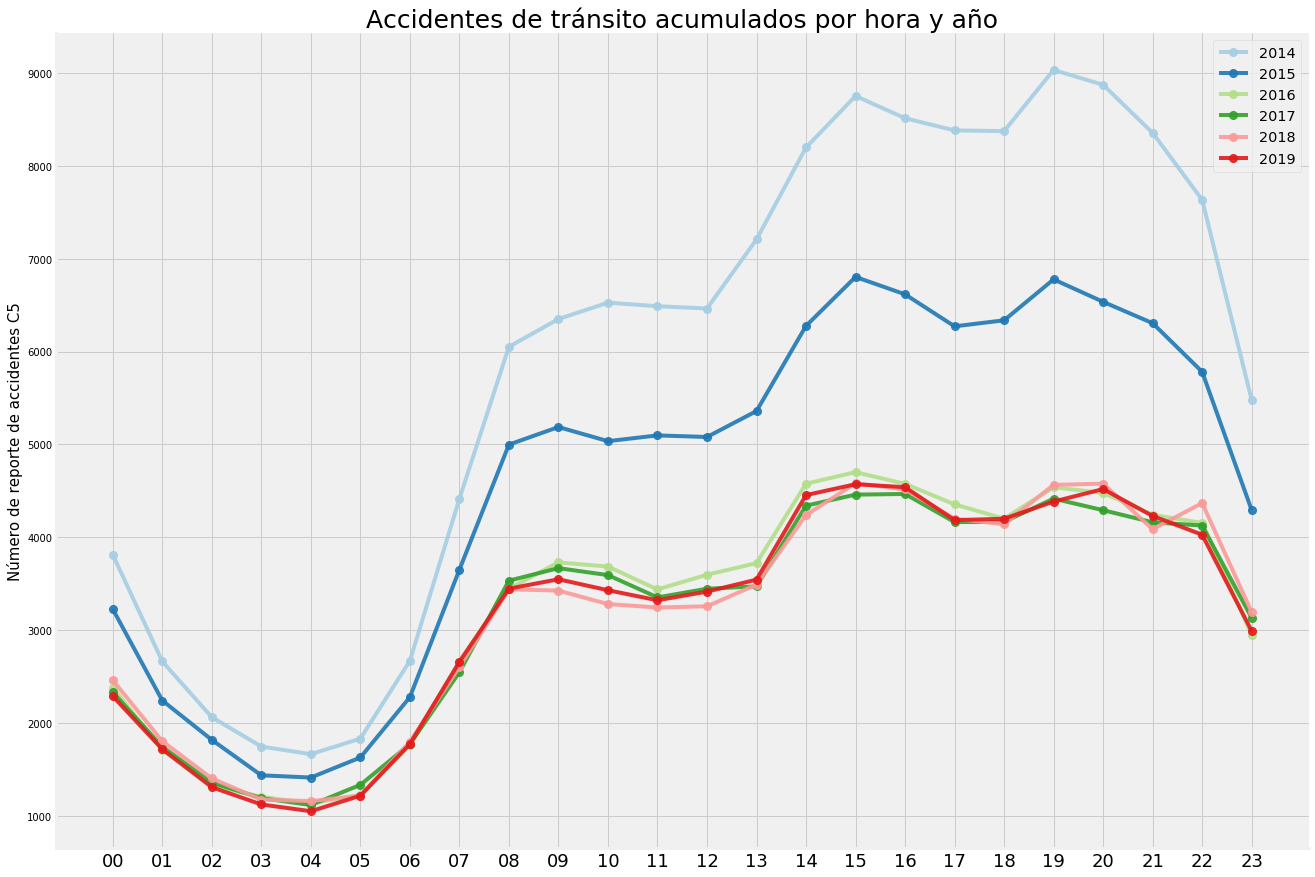

In [5]:
hora14 = pts14.groupby('hora').count()[['folio']].reset_index()
hora14.columns = ['hora','conteo']

hora15 = pts15.groupby('hora').count()[['folio']].reset_index()
hora15.columns = ['hora','conteo']

hora16 = pts16.groupby('hora').count()[['folio']].reset_index()
hora16.columns = ['hora','conteo']

hora17 = pts17.groupby('hora').count()[['folio']].reset_index()
hora17.columns = ['hora','conteo']

hora18 = pts18.groupby('hora').count()[['folio']].reset_index()
hora18.columns = ['hora','conteo']

hora19 = pts19.groupby('hora').count()[['folio']].reset_index()
hora19.columns = ['hora','conteo']

   
fig, ax = plt.subplots(1,1,figsize=(20, 15))
ax.plot(hora14.hora, hora14.conteo, marker='o', color='#a6cee3', markersize=8, linewidth=4, alpha=0.9, label = '2014')
ax.plot(hora15.hora, hora15.conteo, marker='o', color='#1f78b4', markersize=8, linewidth=4, alpha=0.9, label = '2015')
ax.plot(hora16.hora, hora16.conteo, marker='o', color='#b2df8a', markersize=8, linewidth=4, alpha=0.9, label = '2016')
ax.plot(hora17.hora, hora17.conteo, marker='o', color='#33a02c', markersize=8, linewidth=4, alpha=0.9, label = '2017')
ax.plot(hora18.hora, hora18.conteo, marker='o', color='#fb9a99', markersize=8, linewidth=4, alpha=0.9, label = '2018')
ax.plot(hora19.hora, hora19.conteo, marker='o', color='#e31a1c', markersize=8, linewidth=4, alpha=0.9, label = '2019')
plt.xticks(fontsize = 18)
plt.ylabel("Número de reporte de accidentes C5",fontsize =15) 
ax.legend(fontsize = 'x-large')
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)
plt.title("Accidentes de tránsito acumulados por hora y año", loc='center', fontsize=25, fontweight=0) 
#fig.savefig('/Users/daniel.rodriguez/Documents/ACC/ACC_PROOF/ACC1/EDA_acc/por_hora_año_li.png', format = 'png', dpi = 200, bbox_inches = 'tight')
plt.show()

### ¿Como es la distribución de la ocurrencia de los accidentes entre hora del día y día de la semana?

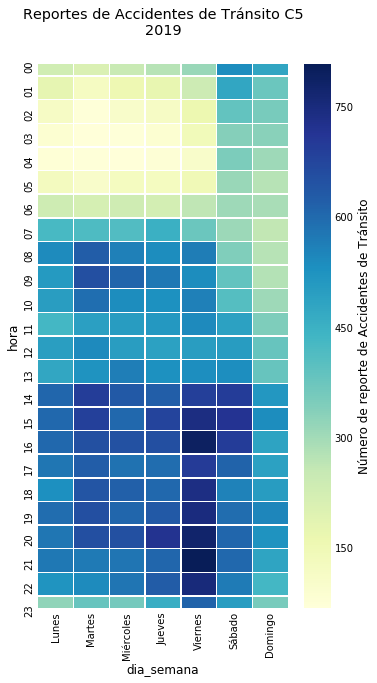

In [6]:
fechas2 = pts19['hora_creacion'].str.split(":", expand = True)
pts19['hora'] = fechas2[0]

dia_sem_hora = pts19.groupby(['hora','dia_semana']).count()[['folio']].reset_index()
por_dia_sem_hora = dia_sem_hora.pivot("hora","dia_semana",'folio')
por_dia_sem_hora = por_dia_sem_hora[['Lunes','Martes','Miércoles','Jueves','Viernes','Sábado','Domingo']]


fig = plt.figure(figsize=(5,10))
r = sns.heatmap(por_dia_sem_hora,linewidths=.5, fmt='.0f',cmap="YlGnBu",cbar_kws={'label': 'Número de reporte de Accidentes de Tránsito'})
r.set_title('Reportes de Accidentes de Tránsito C5\n2019', pad = 30)
#fig.savefig('/Users/daniel.rodriguez/Documents/ACC/ACC_PROOF/ACC1/EDA_acc/hora_vs_dia19.png', format = 'png', dpi = 200, bbox_inches = 'tight')
plt.show()
plt.close()

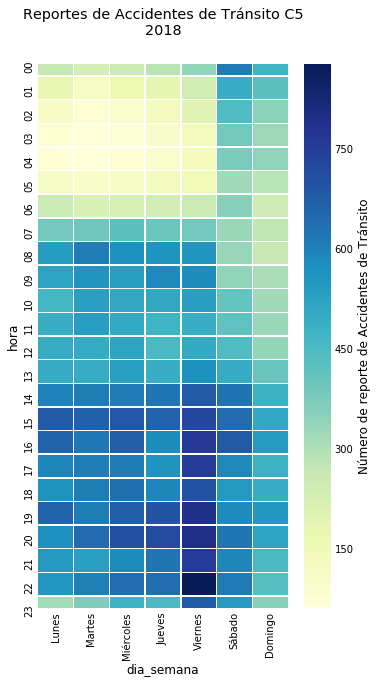

In [11]:
fechas2 = pts18['hora_creacion'].str.split(":", expand = True)
pts18['hora'] = fechas2[0]

dia_sem_hora = pts18.groupby(['hora','dia_semana']).count()[['folio']].reset_index()
por_dia_sem_hora = dia_sem_hora.pivot("hora","dia_semana",'folio')
por_dia_sem_hora = por_dia_sem_hora[['Lunes','Martes','Miércoles','Jueves','Viernes','Sábado','Domingo']]


fig = plt.figure(figsize=(5,10))
r = sns.heatmap(por_dia_sem_hora,linewidths=.5, fmt='.0f',cmap="YlGnBu",cbar_kws={'label': 'Número de reporte de Accidentes de Tránsito'})
r.set_title('Reportes de Accidentes de Tránsito C5\n2018', pad = 30)
#fig.savefig('/Users/daniel.rodriguez/Documents/ACC/ACC_PROOF/ACC1/EDA_acc/hora_vs_dia19.png', format = 'png', dpi = 200, bbox_inches = 'tight')
plt.show()
plt.close()

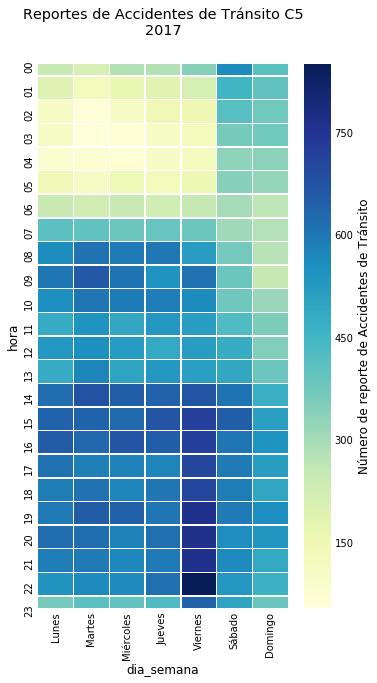

In [12]:
fechas2 = pts17['hora_creacion'].str.split(":", expand = True)
pts17['hora'] = fechas2[0]

dia_sem_hora = pts17.groupby(['hora','dia_semana']).count()[['folio']].reset_index()
por_dia_sem_hora = dia_sem_hora.pivot("hora","dia_semana",'folio')
por_dia_sem_hora = por_dia_sem_hora[['Lunes','Martes','Miércoles','Jueves','Viernes','Sábado','Domingo']]


fig = plt.figure(figsize=(5,10))
r = sns.heatmap(por_dia_sem_hora,linewidths=.5, fmt='.0f',cmap="YlGnBu",cbar_kws={'label': 'Número de reporte de Accidentes de Tránsito'})
r.set_title('Reportes de Accidentes de Tránsito C5\n2017', pad = 30)
#fig.savefig('/Users/daniel.rodriguez/Documents/ACC/ACC_PROOF/ACC1/EDA_acc/hora_vs_dia19.png', format = 'png', dpi = 200, bbox_inches = 'tight')
plt.show()
plt.close()

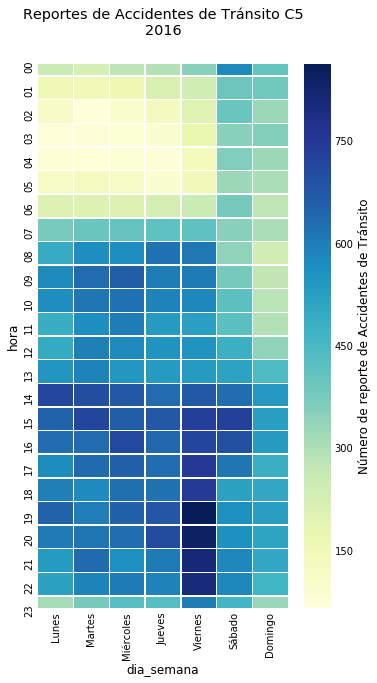

In [13]:
fechas2 = pts16['hora_creacion'].str.split(":", expand = True)
pts16['hora'] = fechas2[0]

dia_sem_hora = pts16.groupby(['hora','dia_semana']).count()[['folio']].reset_index()
por_dia_sem_hora = dia_sem_hora.pivot("hora","dia_semana",'folio')
por_dia_sem_hora = por_dia_sem_hora[['Lunes','Martes','Miércoles','Jueves','Viernes','Sábado','Domingo']]


fig = plt.figure(figsize=(5,10))
r = sns.heatmap(por_dia_sem_hora,linewidths=.5, fmt='.0f',cmap="YlGnBu",cbar_kws={'label': 'Número de reporte de Accidentes de Tránsito'})
r.set_title('Reportes de Accidentes de Tránsito C5\n2016', pad = 30)
#fig.savefig('/Users/daniel.rodriguez/Documents/ACC/ACC_PROOF/ACC1/EDA_acc/hora_vs_dia19.png', format = 'png', dpi = 200, bbox_inches = 'tight')
plt.show()
plt.close()

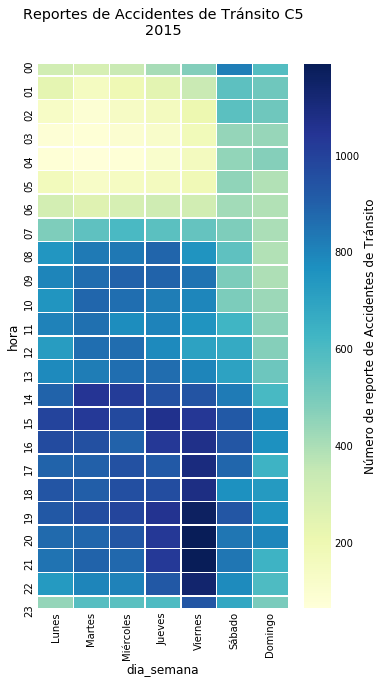

In [14]:
fechas2 = pts15['hora_creacion'].str.split(":", expand = True)
pts15['hora'] = fechas2[0]

dia_sem_hora = pts15.groupby(['hora','dia_semana']).count()[['folio']].reset_index()
por_dia_sem_hora = dia_sem_hora.pivot("hora","dia_semana",'folio')
por_dia_sem_hora = por_dia_sem_hora[['Lunes','Martes','Miércoles','Jueves','Viernes','Sábado','Domingo']]


fig = plt.figure(figsize=(5,10))
r = sns.heatmap(por_dia_sem_hora,linewidths=.5, fmt='.0f',cmap="YlGnBu",cbar_kws={'label': 'Número de reporte de Accidentes de Tránsito'})
r.set_title('Reportes de Accidentes de Tránsito C5\n2015', pad = 30)
#fig.savefig('/Users/daniel.rodriguez/Documents/ACC/ACC_PROOF/ACC1/EDA_acc/hora_vs_dia19.png', format = 'png', dpi = 200, bbox_inches = 'tight')
plt.show()
plt.close()

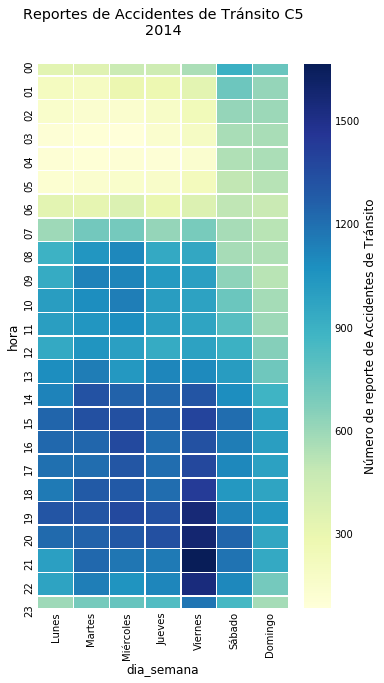

In [15]:
fechas2 = pts14['hora_creacion'].str.split(":", expand = True)
pts14['hora'] = fechas2[0]

dia_sem_hora = pts14.groupby(['hora','dia_semana']).count()[['folio']].reset_index()
por_dia_sem_hora = dia_sem_hora.pivot("hora","dia_semana",'folio')
por_dia_sem_hora = por_dia_sem_hora[['Lunes','Martes','Miércoles','Jueves','Viernes','Sábado','Domingo']]


fig = plt.figure(figsize=(5,10))
r = sns.heatmap(por_dia_sem_hora,linewidths=.5, fmt='.0f',cmap="YlGnBu",cbar_kws={'label': 'Número de reporte de Accidentes de Tránsito'})
r.set_title('Reportes de Accidentes de Tránsito C5\n2014', pad = 30)
#fig.savefig('/Users/daniel.rodriguez/Documents/ACC/ACC_PROOF/ACC1/EDA_acc/hora_vs_dia19.png', format = 'png', dpi = 200, bbox_inches = 'tight')
plt.show()
plt.close()

### ¿Cómo se distribuyen los accidentes por Alcaldía de ocurrencia

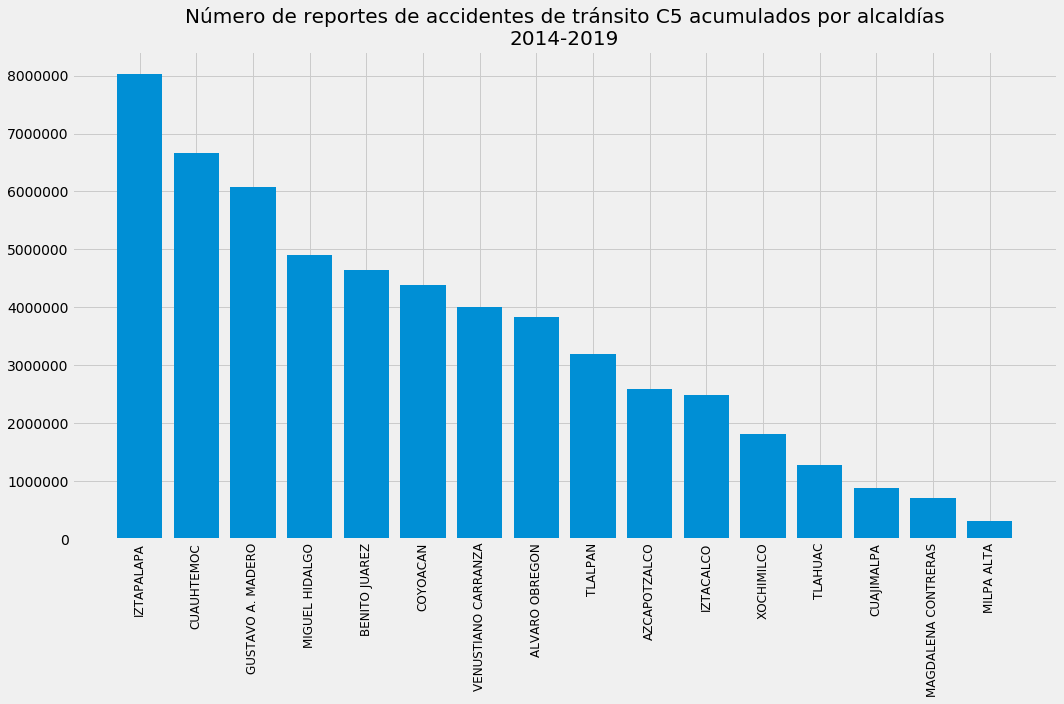

In [13]:
alcaldia = real_pts.delegacion_inicio.value_counts().to_frame().reset_index()
alcaldia.columns = ['alcaldia','conteo']

fig, ax = plt.subplots(figsize = (15, 10))
ax.bar(alcaldia.alcaldia, alcaldia.conteo*100)
plt.title("Número de reportes de accidentes de tránsito C5 acumulados por alcaldías\n2014-2019", loc='center', fontsize=20, fontweight=0)
plt.xticks(rotation = 90, fontsize = 12)

plt.tight_layout()
#fig.savefig('/Users/daniel.rodriguez/Documents/ACC/ACC_PROOF/ACC1/EDA_acc/por_alcaldia.png', format = 'png', dpi = 200, bbox_inches = 'tight')
plt.show()

### ¿Cómo se distribuyen los accidentes por tipo de incidente?

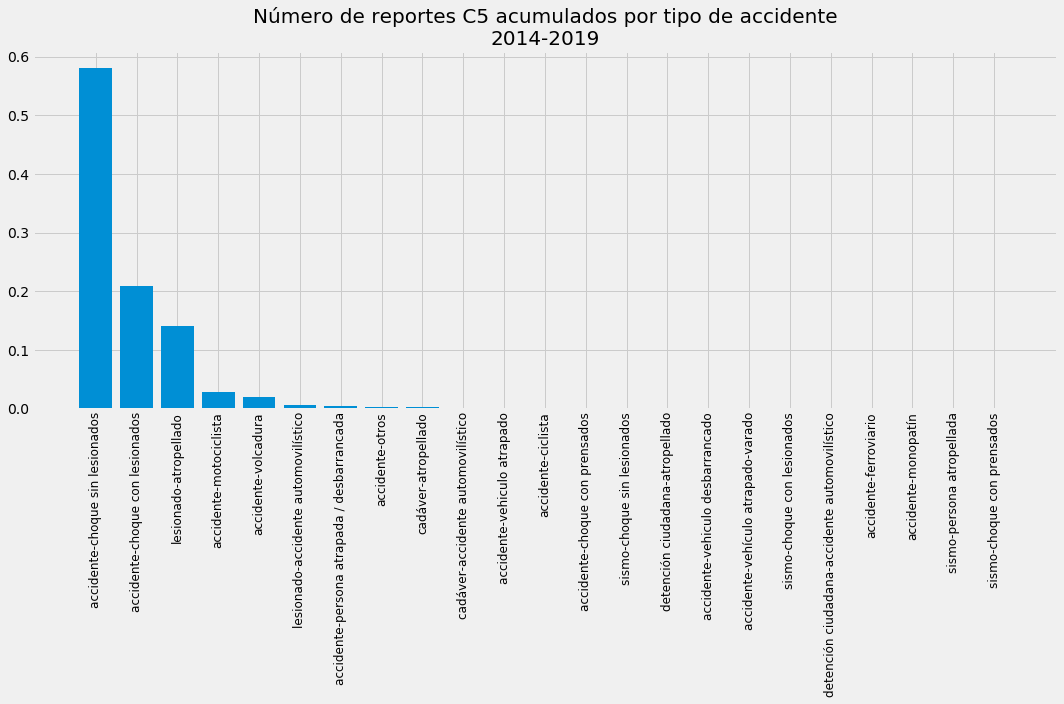

In [14]:
por_tipo = real_pts.incidente_c4.value_counts(normalize = True).to_frame().reset_index()
por_tipo.columns = ['tipo','conteo']

fig, ax = plt.subplots(figsize = (15, 10))
ax.bar(por_tipo.tipo, por_tipo.conteo)
plt.title("Número de reportes C5 acumulados por tipo de accidente\n2014-2019", loc='center', fontsize=20, fontweight=0)
plt.xticks(rotation = 90, fontsize = 12)
plt.tight_layout()
#fig.savefig('/Users/daniel.rodriguez/Documents/ACC/ACC_PROOF/ACC1/EDA_acc/por_tipo.png', format = 'png', dpi = 200, bbox_inches = 'tight')
plt.show()

### ¿Cuál es la densidad de accidentes en la Ciudad por año?

In [17]:
roads_car = gpd.read_file('/Users/daniel.rodriguez/Documents/ACC/ACC_PROOF/ACC1//shp_b//processed_data//shp_OSM//roads.shp')
alcaldias = gpd.read_file('/Users/daniel.rodriguez/Documents/ACC/ACC_PROOF/ACC1//shp_b//original_data//alcaldias_cdmx//alcaldias.shp')

alcaldias.replace([
                   'CuauhtÃ©moc', 
                   'Ã\x81lvaro ObregÃ³n', 
                   'Xochimilco', 
                   'TlÃ¡huac',
                   'Benito JuÃ¡rez', 
                   'Cuajimalpa de Morelos', 
                   'Gustavo A. Madero',
                   'Tlalpan', 
                   'Venustiano Carranza', 
                   'Azcapotzalco', 
                   'Iztapalapa',
                   'Iztacalco', 
                   'Miguel Hidalgo', 
                   'La Magdalena Contreras',
                   'CoyoacÃ¡n', 
                   'Milpa Alta'],
                  [
                   'Cuauhtemoc',
                   'Alvaro Obregon',
                   'Xochimilco',
                   'Tlahuac',
                   'Benito Juarez',
                   'Cuajimalpa de Morelos',
                   'Gustavo A. Madero',
                   'Tlalpan',
                   'Venustiano Carranza',
                   'Azcapotzalco',
                   'Iztapalapa',
                   'Iztacalco',
                   'Miguel Hidalgo',
                   'La Magdalena Contreras',
                   'Coyoacan',
                   'Milpa Alta'], inplace = True)

alcaldias = alcaldias[['nomgeo','geometry']]


In [18]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,15)

In [19]:
def plot_point_distribution(**kwargs):
    #print(kwargs)
    ax = plt.gca()
    
    # context!
    alcaldias.plot(ax = ax, alpha = 0.3, color = '#ece2f0', edgecolor = 'black', linewidth = 3)
    roads_car[(roads_car.fclass == 'primary') | (roads_car.fclass == 'secondary')| (roads_car.fclass == 'terciary')].plot(linewidth = 1, color = '#3690c0', alpha = 0.3,edgecolor = 'gray', ax = ax)

    
    color = kwargs.pop('color')
    geodf = kwargs.pop('data')
    bounds = kwargs.pop('bounds', None)

    sns.kdeplot(geodf.geometry.x, geodf.geometry.y, **kwargs, ax = ax)

    #if bounds is not None:
    #    plt.xlim(bounds[:,0])
    #    plt.ylim(bounds[:,1])
    
    plt.axis('equal')
    plt.axis('off')

In [20]:
def plot_heat_map(data, label, alcaldias):
    g = sns.FacetGrid(data=data, 
                      size=15, 
                      dropna=False);

    g.map_dataframe(plot_point_distribution, 
                    shade=True, 
                    alpha=0.8,
                    cbar=True, 
                    cmap='YlGnBu', 
                    cbar_kws={'orientation': 'horizontal',
                              'label': label}
                              #'fraction': 0.02,
                              #'shrink': 0.35,
                              #'pad': 0}
                   )
    #g.savefig('/Users/daniel.rodriguez/Documents/ACC/ACC_PROOF/ACC1/final_datasets/real_acc19.png', format = 'png', dpi = 200, bbox_inches = 'tight')


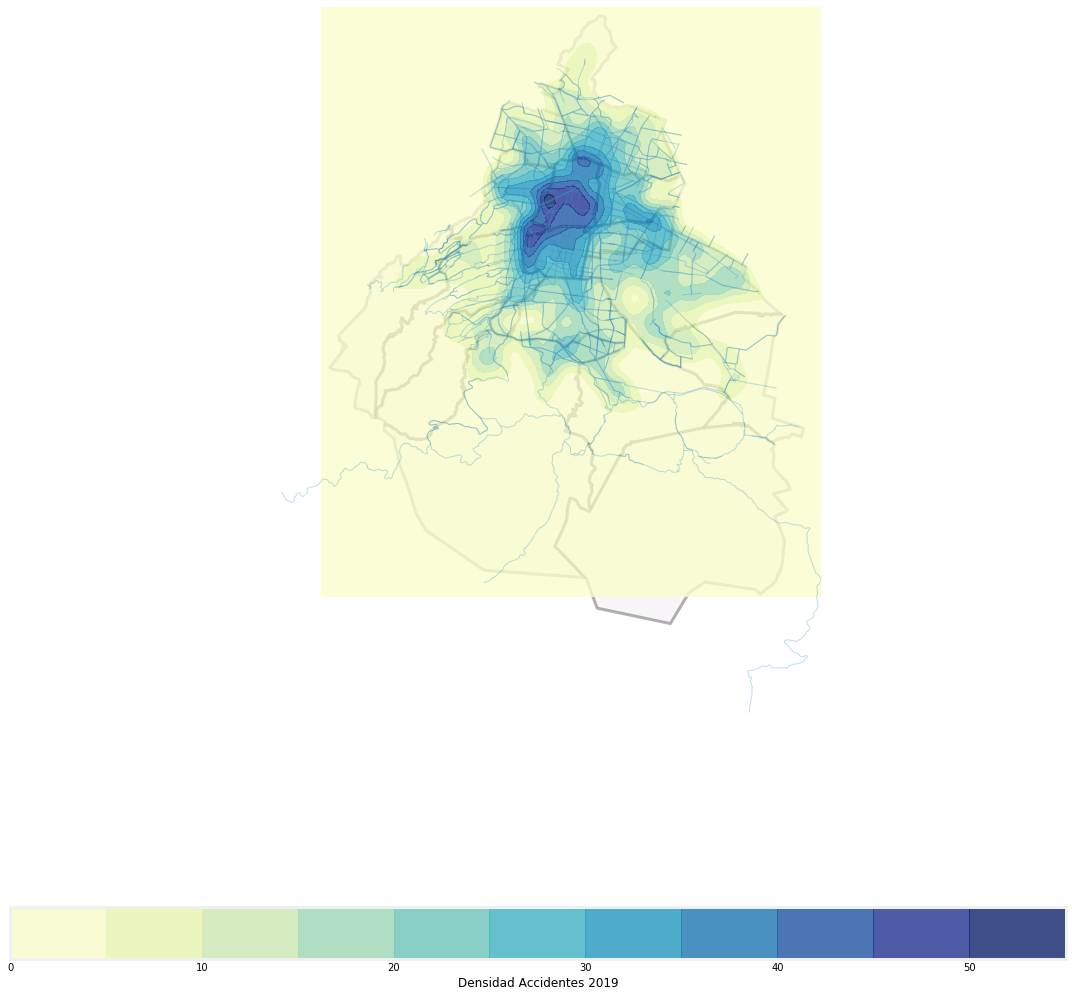

In [22]:
points_clean = pts19[pts19.geometry.type =='Point']
plot_heat_map(points_clean,'Densidad Accidentes 2019',alcaldias)

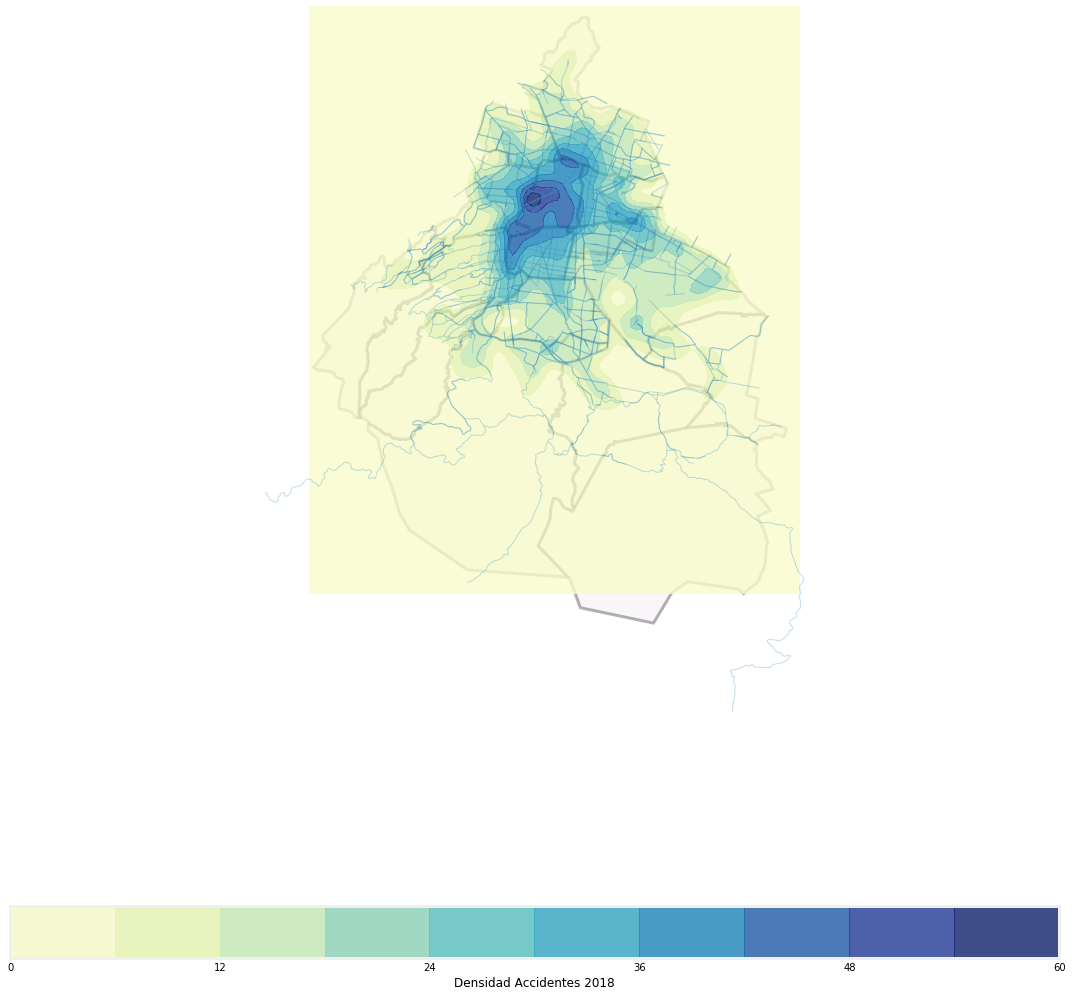

In [23]:
points_clean = pts18[pts18.geometry.type =='Point']
plot_heat_map(points_clean,'Densidad Accidentes 2018',alcaldias)

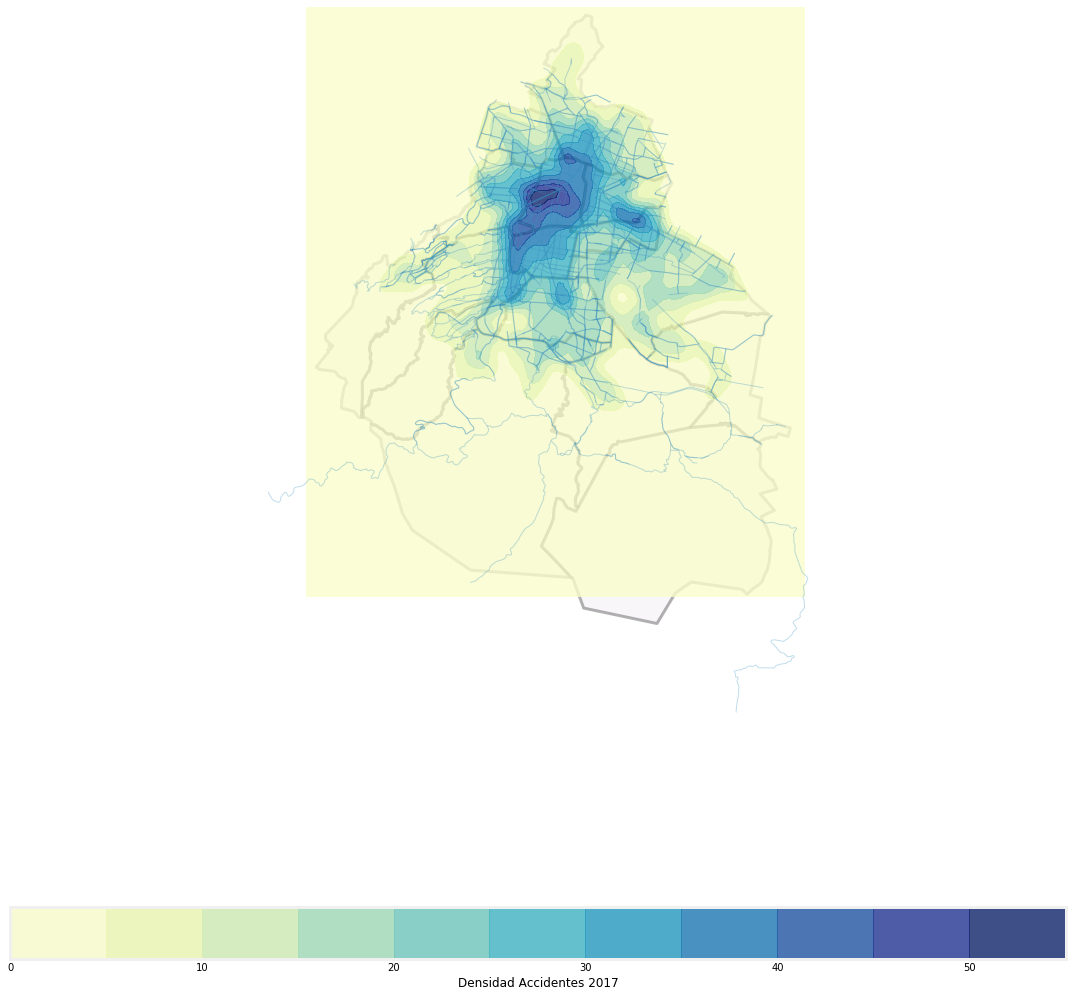

In [24]:
points_clean = pts17[pts17.geometry.type =='Point']
plot_heat_map(points_clean,'Densidad Accidentes 2017',alcaldias)

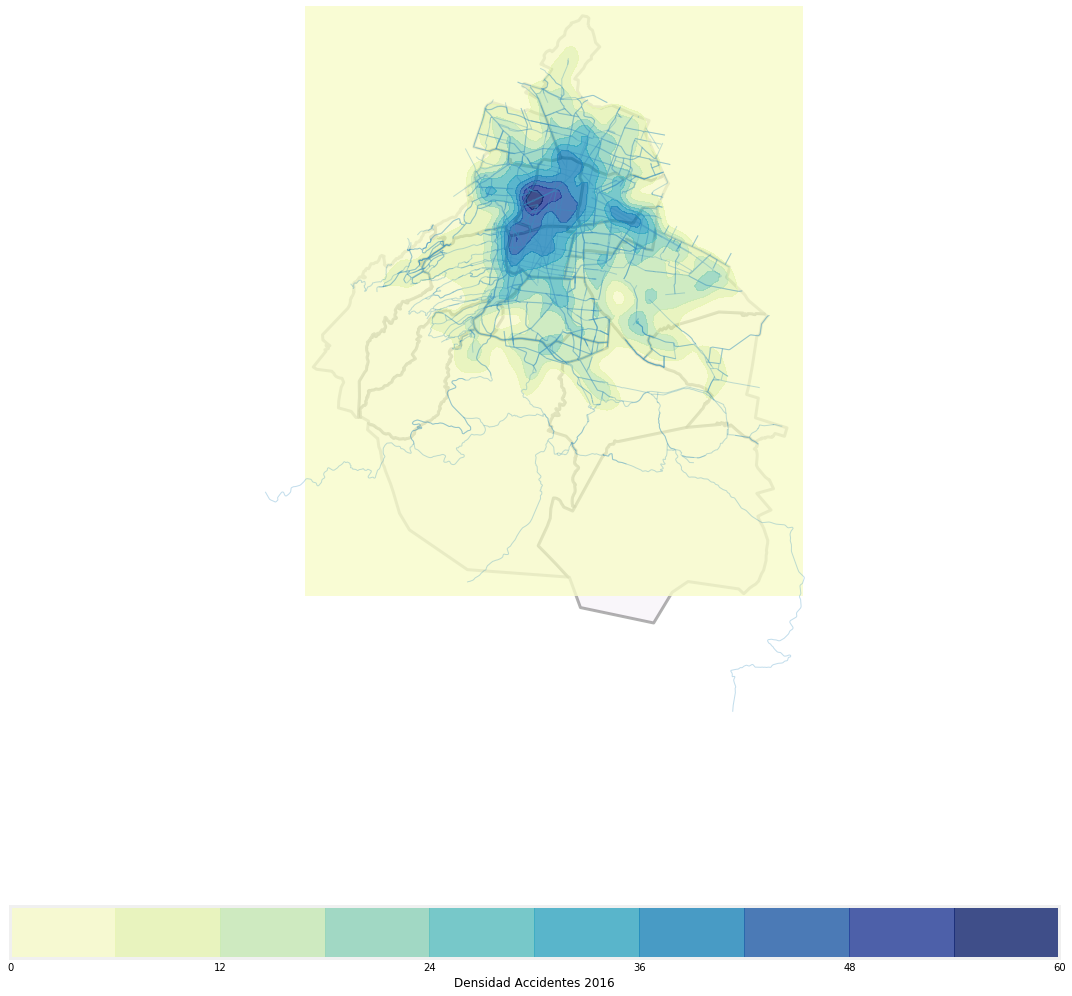

In [25]:
points_clean = pts16[pts16.geometry.type =='Point']
plot_heat_map(points_clean,'Densidad Accidentes 2016',alcaldias)

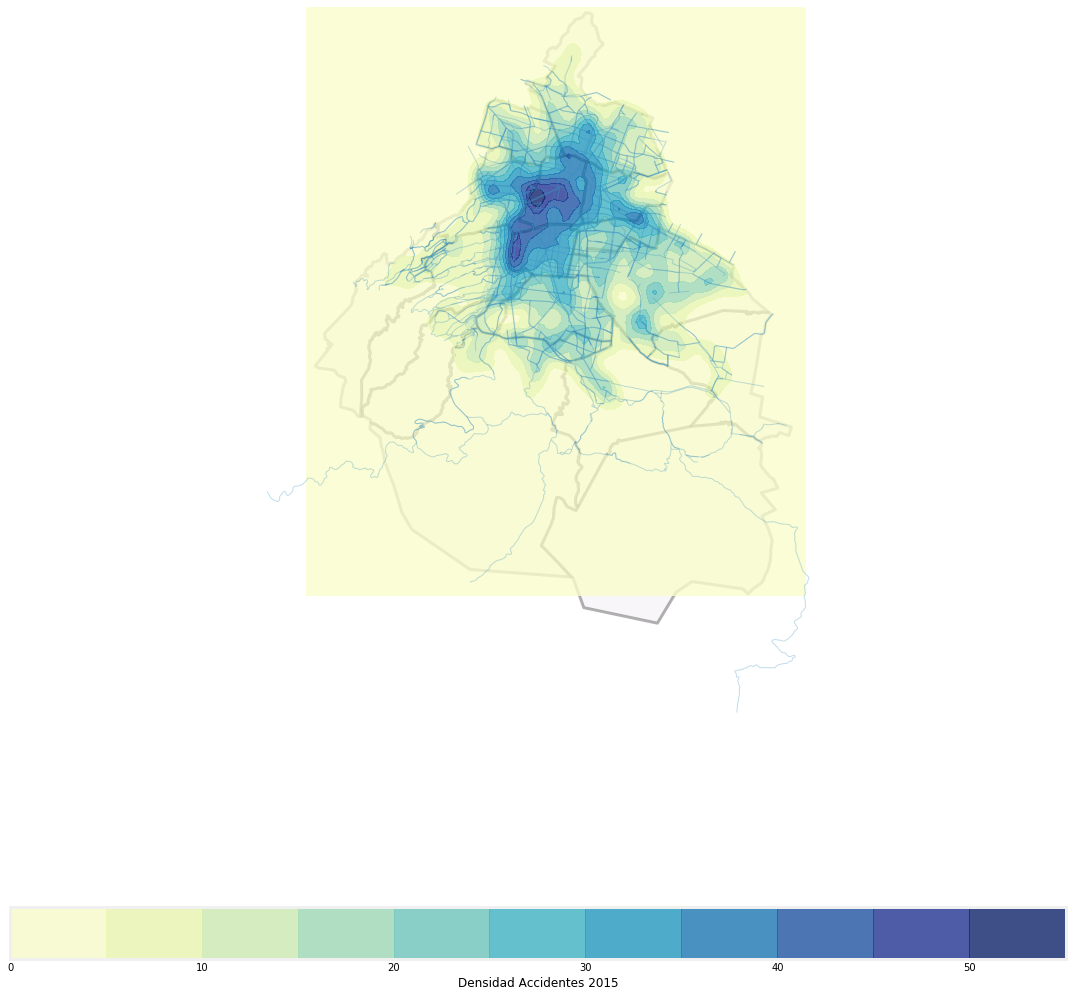

In [26]:
points_clean = pts15[pts15.geometry.type =='Point']
plot_heat_map(points_clean,'Densidad Accidentes 2015',alcaldias)

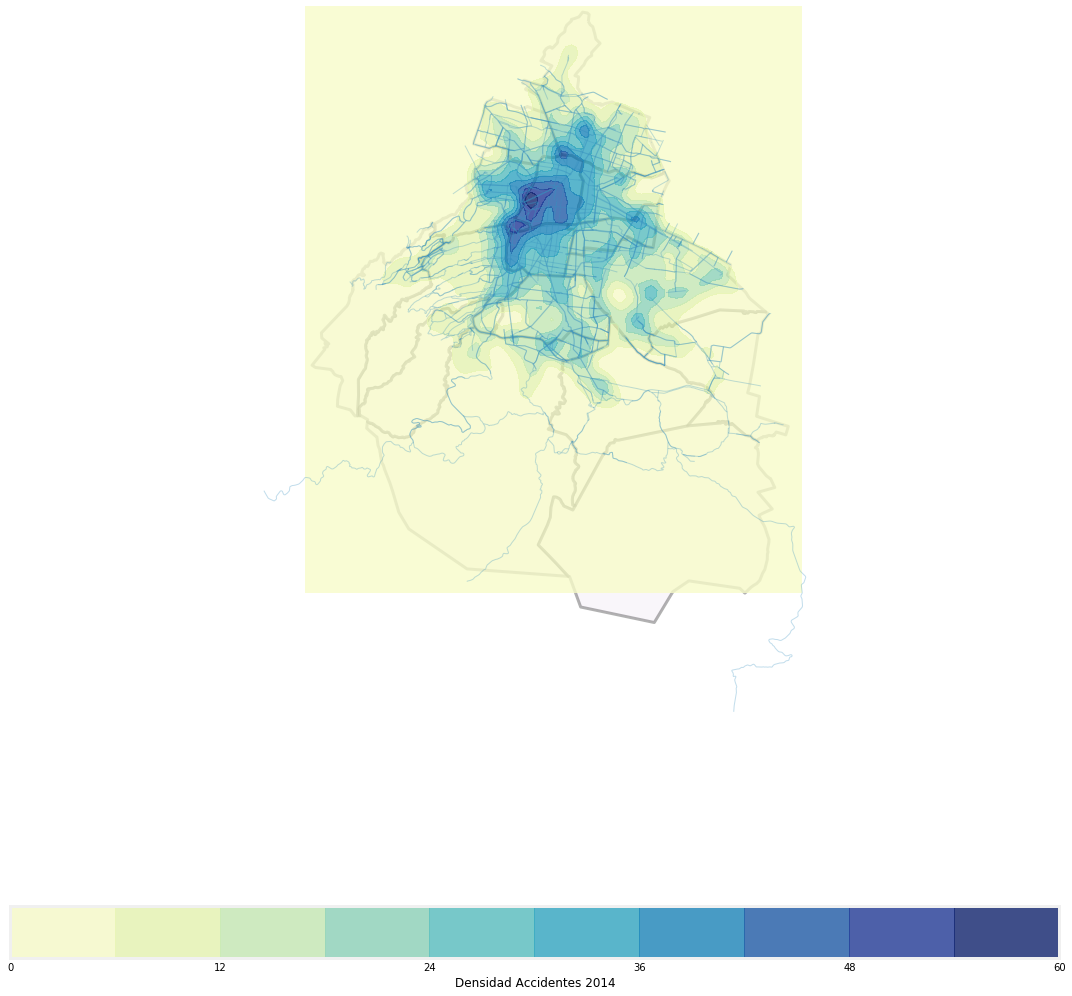

In [27]:
points_clean = pts14[pts14.geometry.type =='Point']
plot_heat_map(points_clean,'Densidad Accidentes 2014',alcaldias)

In [ ]:
#Si queremos verlo en un mapa interactivo

#import mplleaflet
#mplleaflet.show(fig = ax.figure, tiles = 'cartodb_positron')